PROJETO 3 - CIÊNCIA DOS DADOS

Grupo: Gabriel Moura, Felipe Aron e Guilherme Aliperti


Projeto de regressão linear utilizando base de dados dos jogadores do FIFA. Pretendemos encontrar o coeficiente de determinação, simbolizado por r^2, que indica quanto da variação total é comum aos elementos que constituem os pares analisados. Analisaremos o coeficiente de determinação entre o overall (número que representa a qualidade do jogador) com suas outras características. Pretendemos tambem encontrar a combinação de 3 atributos do jogador(aceleração, long shot...) que retorne o maior R^2 em relação ao overall. 

In [1]:
import math
import os.path
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt
from random import shuffle
from scipy.stats import linregress
import statsmodels.api as sm

%matplotlib inline

C:\Users\guial\Documents\guizika\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Transforma os valores em float e sem os caracteres invalidos
#Aqui estamos somente ajustando o dataframe para conseguirmos iniciar a analise...
df_completo = pd.read_excel("dados_completo.xls")
lista_final_valor = []
lista_final_sal = []
df_completo = df_completo.dropna(axis=0, how='any')


    #Ajustando os Valores dos jogadores para float...
for valores in df_completo["Value"]:
    valores = str(valores)
    l = valores.split("¬")
    del l[0]
    for x in l:
        carac = x.split("M")
        if len(carac) == 2:
            vf = float(carac[0]) * 1000000
            lista_final_valor.append(vf)
        else:
            carac = x.split("K")
            vf = float(carac[0]) * 1000
            lista_final_valor.append(vf)
            
# Ajustando os salários dos jogadores para float...          
for valores in df_completo["Wage"]:
    valores = str(valores)
    l = valores.split("¬")
    del l[0]
    for x in l:
        carac = x.split("M")
        if len(carac) == 2:
            vf = float(carac[0]) * 1000000
            lista_final_sal.append(vf)
        else:
            carac = x.split("K")
            vf = float(carac[0]) * 1000
            lista_final_sal.append(vf)
            
# Cria o Novo Dataframe ajustado...
df_valor_idade = pd.DataFrame({"Valor": lista_final_valor, "Overall": df_completo.Overall, "Idade": df_completo.Age,"Salário": lista_final_sal, "Potencial":df_completo.Potential})


CURIOSIDADE : O jogador que mais tem potencial de evoluir no fifa 18 a partir de um overall pré-determinado...

In [3]:
lp = []
lo = []
ln = []
z = 0
for valores in df_completo["Overall"]:
    if valores > 60:
        lo.append(valores)
    else:
        lo.append(0)


for valores in df_completo["Potential"]:
    if lo[z] > 60:
        lp.append(valores)
    z = z + 1
    
    
for valores in df_completo["Name"]:
    ln.append(valores)

x = 0

lr = []
while x < len(lp):
    resultado = lp[x] - lo[x]
    lr.append(resultado)
    x = x + 1
    

print("O jogador que mais tem potencial de evoluir do FIFA 18 é: {0}".format(ln[(lr.index(max(lr)))]))
    

O jogador que mais tem potencial de evoluir do FIFA 18 é: A. Gomes


Vamos analisar o coeficiente de determinação do valor em relação ao seu Overall por dois métodos diferentes de regressão linear:

In [4]:
# R2 do Overall em relação ao Valor

def lin_regression(x, y):
    m, b, R, p, SEm = linregress(x, y)

    n = len(x)
    SSx = np.var(x, ddof=1) * (n-1)  
    SEb2 = SEm **2 * (SSx/n + np.mean(x)**2)
    SEb = SEb2**0.5

    return m, b, SEm, SEb, R, p

m, b, Sm, Sb, R, p = lin_regression(df_completo.Overall,lista_final_valor)

print('m = {:>.4g} +- {:6.4f}'.format(m, Sm))
print('b = {:>.4g} +- {:6.4f}\n'.format(b, Sb))

print('R2 = {:7.5f}'.format(R**2))
print('p of test F : {:<8.6f}'.format(p))



m = 5.099e+05 +- 4904.3501
b = -3.136e+07 +- 327511.9548

R2 = 0.40731
p of test F : 0.000000


In [5]:
df_valor_idade.describe()

,Idade,Overall,Potencial,Salário,Valor
count,15734.000000,15734.000000,15734.000000,15734.000000,1.573400e+04
mean,24.995424,66.425194,71.392208,12152.027456,2.516551e+06
std,4.488817,6.873878,6.033923,23857.660639,5.492403e+06
min,16.000000,46.000000,46.000000,1000.000000,0.000000e+00
25%,21.000000,62.000000,67.000000,2000.000000,3.500000e+05
50%,25.000000,66.000000,71.000000,4000.000000,7.500000e+05
75%,28.000000,71.000000,75.000000,13000.000000,2.300000e+06
max,41.000000,94.000000,94.000000,565000.000000,1.230000e+08


O resultado da regressão feita abaixo nos possibilita afirmar que quase 40% do overall do jogador pode ser "explicado" exclusivamente pelo seu Valor de mercado.

In [6]:
# R2 do Overall em relação ao Valor
Y = df_valor_idade.Overall
X = df_valor_idade.Valor
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()
results.rsquared


0.4073124340185903

Vamos agora avaliar o coeficiente entre o valor e a idade do jogador:

In [32]:
# R2 da Idade em relação ao Valor
Y = df_valor_idade.Valor
X = df_valor_idade.Idade
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()
results.rsquared

0.0079766747660521276

A regressão acima nos permite afirmar que a idade do jogador interfere muito pouco no seu valor de mercado, algo que não é muito obvio a principio. O resultado pode ser justificado pela grande diferença de valor de jogadores da mesma idade.

O salário de um jogador geralmente tem muita relação com o seu valor no mercado no mundo real (sem contar os outliers, que seriam os altíssimos salários pagados por clubes chinenes e árabes), portanto é de se imaginar que o coeficiente de determinação entre o salário e o valor de um jogador é relativamente alto, portanto vamos analisar a inflûencia do salário de cada jogador no valor dele:

In [8]:
# R2 do Salário em relação ao Valor
Y = df_valor_idade.Valor
X = df_valor_idade.Salário
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()
results.rsquared


0.72871050371177715

Como esperado o coeficiente de determinação da análise acima é bem alto. O gráfico de scatter abaixo ajuda a vizualizar a relação. Os pontos que fogem a reta são os jogadores de salários astronomicos(outliers) como Neymar, Messi, CR7... Esses jogadores recebem salarios grandes como atrativo para não mudarem de clube e também como incentivo para fazer uma transferência.

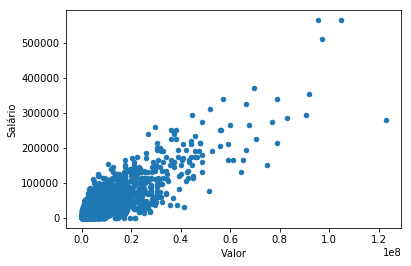

In [43]:
df_valor_idade.plot.scatter("Valor",'Salário')
plt.show()

Vamos agora analisar o coeficiente de determinação de tres carcterísticas juntas (o salário, o potencial e o overall) em relação ao seu valor:

In [10]:
# R2 do Overall,Potencial e Salário juntos em relação ao Valor
Y = df_valor_idade.Overall
X = df_valor_idade.loc[:, ("Valor", "Potencial","Salário")]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()
results.rsquared

0.55179002403946276

O resultado da regressão acima nos permite concluir que há grande relação entre o Overall e a combinação de Salário, Potencial e valor. 

In [11]:
#Lista Atributos dos jogadores, limpando dados perdidos na tabela...
lista_atributos = list(df_completo)
del lista_atributos[0:12]
del lista_atributos[34:62]

Por conta de valores listados como soma na tabela de dados do excell tivemos que concerta-la com o código abaixo.

In [23]:
# RSquared Dicionário
rsquared = {}

#Ajustando Somas e Subtrações no Excel
for atributo in lista_atributos:
    lista = []
    mais_frequente  = df_completo[atributo].value_counts().index[0]
    for numeros in df_completo.index:
        try:
            data = pd.to_datetime(df_completo.loc[numeros, atributo])
            df_completo.loc[numeros, atributo] = mais_frequente
        except: 
            n = eval(str(df_completo.loc[numeros, atributo]))
            df_completo.loc[numeros, atributo] = n                

A regressão feita não chegou nos resultados esperados por conta de erros que não conseguimos concertar no dataframe.

In [22]:
Y = df_completo.Overall
X = df_completo["Acceleration"]
X = sm.add_constant(X)
model = sm.OLS(Y,X, missing = "drop")
results = model.fit()
results.summary()

C:\Users\guial\Documents\guizika\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Tue, 21 Nov 2017   Prob (F-statistic):                nan
Time:                        18:32:30   Log-Likelihood:                -52656.
No. Observations:               15734   AIC:                         1.053e+05
Df Residuals:                   15733   BIC:                         1.053e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Acceleration     0.9768      0.001   1212.134      0.000       0.975       0.978
==============================================================================
Omnibus:                        0.770   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.680   Jarque-Bera (JB):                0.743
Skew:                           0.003   Prob(JB):                        0.690
Kurtosis:                       3.033   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O objetivo do codigo abaixo é definir os atributos isolados com maior coeficiente de determinação. Infelizmente por conta de erros no dataframe não foi possível chegar a um resultado conclusivo.

In [27]:
for atributo in lista_atributos:
    Y = df_completo.Overall
    X = df_completo[atributo]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X, missing="drop")
    results = model.fit()
    results.summary()
    rsquared[atributo] = results.rsquared
    
print("O atributo com maior R-Squared é: {0}".format(max(rsquared, key=rsquared.get)))
del rsquared[max(rsquared, key=rsquared.get)]
print("O segundo atributo com maior R-Squared é: {0}".format(max(rsquared, key=rsquared.get)))
del rsquared[max(rsquared, key=rsquared.get)]
print("O terceiro atributo com maior R-Squared é: {0}".format(max(rsquared, key=rsquared.get)))
del rsquared[max(rsquared, key=rsquared.get)]
print("O quarto atributo com maior R-Squared é: {0}".format(max(rsquared, key=rsquared.get)))
del rsquared[max(rsquared, key=rsquared.get)]
print("O quinto atributo com maior R-Squared é: {0}".format(max(rsquared, key=rsquared.get)))


C:\Users\guial\Documents\guizika\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

Indo mais adiante pretendemos encontrar a combinação de 3 diferentes atributos com maior coeficiente de determinação. Para fazer isso testamos todas as possíveis combinações, sem repetição, dos 34 atributos em relação ao overall do jogador. Por conta de erros no dataframe(somente na parte dos atributos) não conseguimos chegar a um resultado conclusivo, porém a analise feita seria muito válida para aconselhar o jogador de fifa a escolher os melhores atributos para investir seu tempo e melhorar dentro do jogo.

In [28]:
#Função de regressao linear de 3 variaveis
def atributos(a,b,c):
    Y = df_completo.Overall
    X = df_completo.loc[:, (str(a),str(b),str(c))]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    return results.rsquared







In [29]:
import itertools
#Utilizando todas as possiveis combinações de 3 atributos(dentro do total de 34 atributos) conseguimos encontrar a 
#combinação com  maior R^2 
g = list(itertools.combinations(lista_atributos,3))

dicfinal = {}

for x in g:
    dicfinal[x[0]+", "+ x[1]+" e "+x[2]] = atributos(x[0],x[1],x[2])

print("A combinação com maior R-Squared é: {0}".format(max(dicfinal, key=dicfinal.get)))

    

        

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).